In [9]:
import os
import pandas as pd
data = pd.read_csv("Customer Churn Data.csv")
data = data.drop(["Id", "state", "phone_number"], axis = 1)
data["international_plan"] = data["international_plan"].map({" yes": True, " no": False})
data["voice_mail_plan"] = data["voice_mail_plan"].map({" yes": True, " no": False})
data["churn"] = data["churn"].map({" True": True, " False": False})

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

data_true = data[data["churn"]]
data_false = data[~data["churn"]]

train_true, test_true = train_test_split(data_true, test_size=0.2)
train_false, test_false = train_test_split(data_false, test_size=0.2)

train = pd.concat([train_true, train_false])
test = pd.concat([test_true, test_false])

train = np.random.permutation(train)
test = np.random.permutation(test)

train_X = train[:,0:17]
train_y = train[:,18].astype(bool)

test_X = test[:,0:17]
test_y = test[:,18].astype(bool)

total = len(test_X)


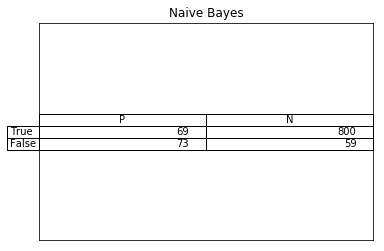

ACCURACY:  0.868131868132
PRECISION:  0.485915492958
RECALL:  0.5390625


In [11]:
from sklearn.naive_bayes import GaussianNB

Gaussian_NB = GaussianNB()
Gaussian_NB.fit(train_X, train_y)
Gaussian_NB_pred = Gaussian_NB.predict(test_X)
Gaussian_NB_correct = np.count_nonzero(Gaussian_NB_pred == test_y)


import matplotlib.pyplot as plt

tot_pos = np.count_nonzero(test_y)
tot_neg = total - tot_pos
TP = np.count_nonzero(np.logical_and(test_y, Gaussian_NB_pred == test_y))
TN = np.count_nonzero(np.logical_and(np.logical_not(test_y), Gaussian_NB_pred == test_y))
FP = tot_pos - TP
FN = tot_neg - TN

fig, ax = plt.subplots()

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

conf_mat= plt.table(cellText = [[TP, TN], [FP, FN]], rowLabels = ["True", "False"], colLabels = ["P", "N"], loc='center')
plt.title("Naive Bayes")
plt.show()

print "ACCURACY: ", (TP+TN)*1.0/(total)
print "PRECISION: ", (TP)*1.0/(TP+FP)
print "RECALL: ", TP*1.0/(TP+FN)

In [12]:
from sklearn import svm_classifier

svm_classifier_clf = svm_classifier.SVC(kernel = "rbf")
svm_classifier_clf.fit(train_X, train_y)
svm_classifier_pred = svm_classifier_clf.predict(test_X)
svm_classifier_correct = np.count_nonzero(svm_classifier_pred == test_y)

import matplotlib.pyplot as plt

tot_pos = np.count_nonzero(test_y)
tot_neg = total - tot_pos
TP = np.count_nonzero(np.logical_and(test_y, svm_classifier_pred == test_y))
TN = np.count_nonzero(np.logical_and(np.logical_not(test_y), svm_classifier_pred == test_y))
FP = tot_pos - TP
FN = tot_neg - TN

fig, ax = plt.subplots()

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

conf_mat= plt.table(cellText = [[TP, TN], [FP, FN]], rowLabels = ["True", "False"], colLabels = ["P", "N"], loc='center')
plt.title("svm_classifier")
plt.show()

print "ACCURACY: ", (TP+TN)*1.0/(total)
print "PRECISION: ", (TP)*1.0/(TP+FP)
print "RECALL: ", TP*1.0/(TP+FN) if (TP+FN)!=0 else "INF"

ImportError: cannot import name svm_classifier

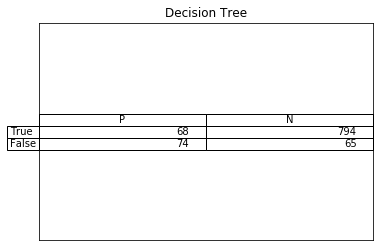

ACCURACY:  0.861138861139
PRECISION:  0.478873239437
RECALL:  0.511278195489


In [13]:
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(train_X, train_y)
pred = tree_classifier.predict(test_X)
correct = np.count_nonzero(pred == test_y)

import matplotlib.pyplot as plt

tot_pos = np.count_nonzero(test_y)
tot_neg = total - tot_pos
TP = np.count_nonzero(np.logical_and(test_y, pred == test_y))
TN = np.count_nonzero(np.logical_and(np.logical_not(test_y), pred == test_y))
FP = tot_pos - TP
FN = tot_neg - TN

fig, ax = plt.subplots()

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

conf_mat= plt.table(cellText = [[TP, TN], [FP, FN]], rowLabels = ["True", "False"], colLabels = ["P", "N"], loc='center')
plt.title("Decision Tree")
plt.show()

print "ACCURACY: ", (TP+TN)*1.0/(total)
print "PRECISION: ", (TP)*1.0/(TP+FP)
print "RECALL: ", TP*1.0/(TP+FN) if (TP+FN)!=0 else "INF"

Assignment 5

best classifier 'Decision Tree Classifier'**.

maximum performance achieved by the classifier:

    ACCURACY:  0.889110889111
    PRECISION:  0.676056338028
    RECALL:  0.596273291925

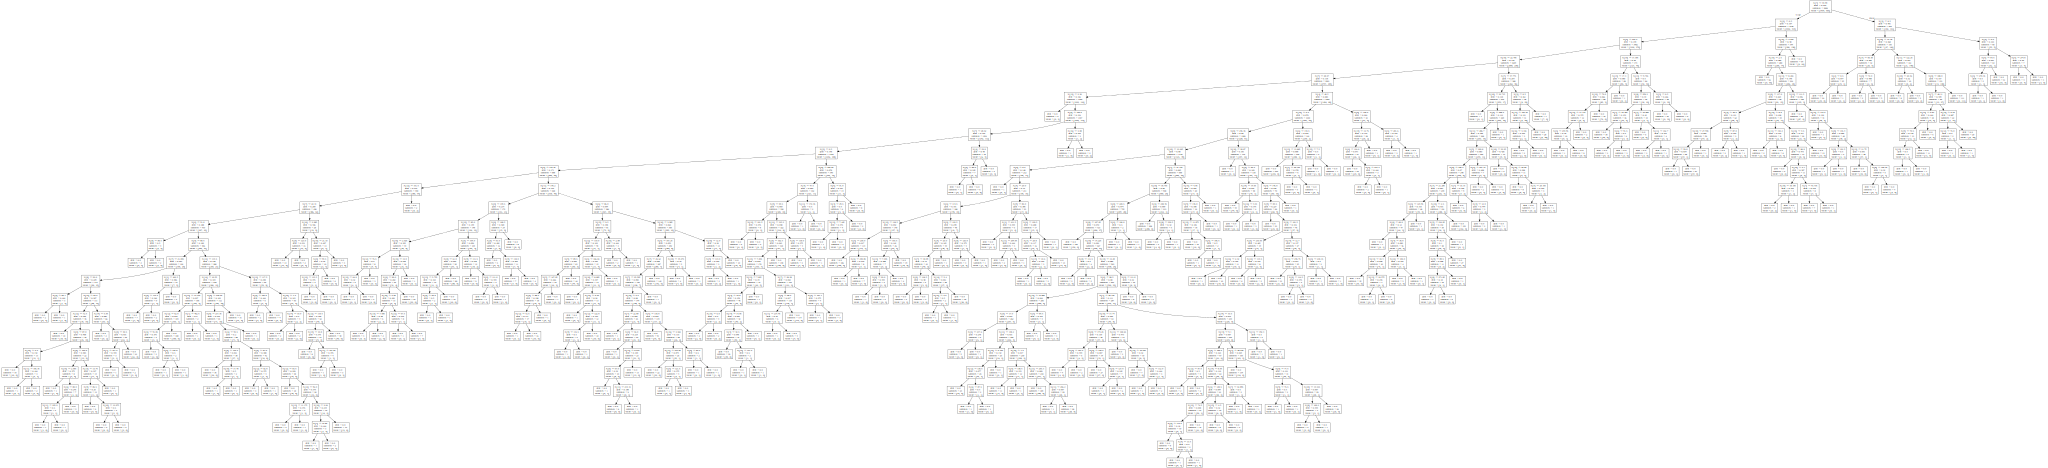

In [14]:
# Visualization of the decision tree
import graphviz
dot_data = tree.export_graphviz(tree_classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph